## TSF - Day4 - Casestudy2 - Predicting the Sales of Fortified Wine

The 'australianwine.csv' contains the monthly sales of 6 types of wines in a super market. Fortified wine has the largest market share and the super market owner feels that the sales of other wine types impacts the sale of fortified wine.

* Build a linear regression model to predict the sale of fortified wine based on the sales of the other 5 wine types. Validate the claims of the owner that fortified wine sales is impacted by sale of other wine types

* Build a time series forecast model to predict the sales of fortified wine and compare it with the regression model

* Analyse how the sales of the 6 wine types has varied in the given time period and present your findings

* What will be your final recommendations to the super market owner
* Compare the results with the findings of casestudy1 and analyse the differences

In [1]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot

import numpy as np

from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot as plt
from pandas.tools.plotting import lag_plot
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df=pd.read_csv('AustralianWines.csv',parse_dates=['Month'])
df.head(13)

Month  Fortified  Red   Rose   sparkling   Sweet white  Dry white
0  1980-01-01       2585   464    112        1686           85       1954
1  1980-02-01       3368   675    118        1591           89       2302
2  1980-03-01       3210   703    129        2304          109       3054
3  1980-04-01       3111   887     99        1712           95       2414
4  1980-05-01       3756  1139    116        1471           91       2226
5  1980-06-01       4216  1077    168        1377           95       2725
6  1980-07-01       5225  1318    118        1966           96       2589
7  1980-08-01       4426  1260    129        2453          128       3470
8  1980-09-01       3932  1120    205        1984          124       2400
9  1980-10-01       3816   963    147        2596          111       3180
10 1980-11-01       3661   996    150        4087          178       4009
11 1980-12-01       3795   960    267        5179          140       3924
12 1981-01-01       2285   530    126        1530          150       2072

In [3]:
df.shape

(180, 7)

In [4]:
df.tail()

Month  Fortified  Red   Rose   sparkling   Sweet white  Dry white
175 1994-08-01       2294  2665     52        1495          205       3670
176 1994-09-01       2416  2639     46        2968          259       4221
177 1994-10-01       2016  2226     51        3385          254       4404
178 1994-11-01       2799  2586     63        3729          275       5086
179 1994-12-01       2467  2684     84        5999          394       5725

In [5]:
df.corr()

Fortified      Red      Rose   sparkling   Sweet white  Dry white
Fortified     1.000000 -0.007608  0.651261    0.092737    -0.125557   0.126792
Red          -0.007608  1.000000 -0.328138    0.270928     0.476127   0.626902
Rose          0.651261 -0.328138  1.000000    0.392965    -0.105588   0.180860
sparkling     0.092737  0.270928  0.392965    1.000000     0.495155   0.792885
Sweet white  -0.125557  0.476127 -0.105588    0.495155     1.000000   0.451236
Dry white     0.126792  0.626902  0.180860    0.792885     0.451236   1.000000

In [6]:
y=df.Fortified
x=df.drop(["Fortified",'Month'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm=LinearRegression()

In [10]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# Make predictions on the test data
pred = lm.predict(xtest)
pred

array([2473.20706905, 3622.3327825 , 3245.07309503, 2488.46233604,
       2745.117533  , 2595.91272355, 3055.65147954, 2724.41216348,
       3298.10872711, 2413.6831658 , 3016.88149071, 2106.10893571,
       2449.065821  , 4681.2771593 , 6052.86119138, 3339.09464628,
       2382.73927282, 2411.93638127, 3018.99765202, 3334.41849093,
       1689.0333267 , 1981.25746356, 3061.95102358, 3479.9068914 ,
       2897.7324271 , 2119.91594374, 3586.94703767, 1940.80635729,
       1650.45897504, 2615.58203364, 3018.79010182, 2638.81375387,
       2562.89154933, 3079.11244675, 3003.51287458, 5234.05740606,
       4282.25807489, 2832.98816907, 2579.98702215, 3244.57409862,
       2996.46948745, 2559.05591535, 3612.0423345 , 2982.34116621,
       3240.39231672, 3411.92089265, 5746.05207613, 3116.77722213,
       3437.14687705, 2660.48897265, 3388.87033864, 2747.49394053,
       2604.2179083 , 2616.38849822])

In [12]:
rmse = sqrt(mean_squared_error(ytest, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 603.772


In [13]:
abs_error = np.abs(ytest-pred)
actual = ytest
mape = np.round(np.mean(abs_error/actual),3)
mape

0.178

## Forecast

In [14]:
df.head()

Month  Fortified  Red   Rose   sparkling   Sweet white  Dry white
0 1980-01-01       2585   464    112        1686           85       1954
1 1980-02-01       3368   675    118        1591           89       2302
2 1980-03-01       3210   703    129        2304          109       3054
3 1980-04-01       3111   887     99        1712           95       2414
4 1980-05-01       3756  1139    116        1471           91       2226

In [15]:
#Create a date range for the dataset
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(df))
dates

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-03-01', '1994-04-01', '1994-05-01', '1994-06-01',
               '1994-07-01', '1994-08-01', '1994-09-01', '1994-10-01',
               '1994-11-01', '1994-12-01'],
              dtype='datetime64[ns]', length=180, freq='MS')

In [16]:
#Create a new column for month and use the month from the created date range
import calendar
df['Mon'] = dates.month
df.head()

Month  Fortified  Red   Rose   sparkling   Sweet white  Dry white  Mon
0 1980-01-01       2585   464    112        1686           85       1954    1
1 1980-02-01       3368   675    118        1591           89       2302    2
2 1980-03-01       3210   703    129        2304          109       3054    3
3 1980-04-01       3111   887     99        1712           95       2414    4
4 1980-05-01       3756  1139    116        1471           91       2226    5

In [17]:
#Rename the numbers in the Month column to calendar months
df['Mon'] = df['Mon'].apply(lambda x: calendar.month_abbr[x])
df['Mon'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Mon, dtype: object

In [18]:
#Create a new column for year and use the year from the created date range
df['Year'] = dates.year
df['Year'].head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: Year, dtype: int64

In [19]:
df.drop(['Month'], axis=1, inplace=True)
df.head()

Fortified  Red   Rose   sparkling   Sweet white  Dry white  Mon  Year
0       2585   464    112        1686           85       1954  Jan  1980
1       3368   675    118        1591           89       2302  Feb  1980
2       3210   703    129        2304          109       3054  Mar  1980
3       3111   887     99        1712           95       2414  Apr  1980
4       3756  1139    116        1471           91       2226  May  1980

In [20]:
data=df.copy()
data.head()

Fortified  Red   Rose   sparkling   Sweet white  Dry white  Mon  Year
0       2585   464    112        1686           85       1954  Jan  1980
1       3368   675    118        1591           89       2302  Feb  1980
2       3210   703    129        2304          109       3054  Mar  1980
3       3111   887     99        1712           95       2414  Apr  1980
4       3756  1139    116        1471           91       2226  May  1980

In [21]:
df.index = dates
df = df[['Fortified']]
df.head()

Fortified
1980-01-01       2585
1980-02-01       3368
1980-03-01       3210
1980-04-01       3111
1980-05-01       3756

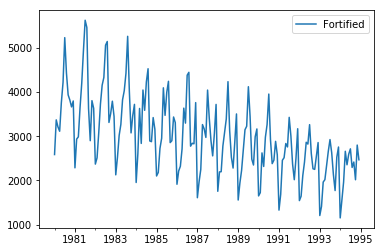

In [22]:
df.plot()

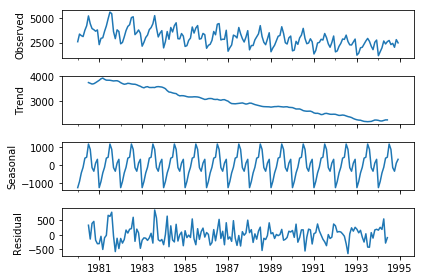

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

decompAir = seasonal_decompose(df, model='additive', freq=12)
decompAir.plot()
plt.show()

Observations:
    
    Trend: There is a decreasing trend observed in the Sales.                                                                   
    
    Seasonality: Seasonal plot displays a fairly consistent month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend.
    
    Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components.
    
    Overall, there has been a decreasing sales and the Seasonality is maintained Annually.

In [24]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

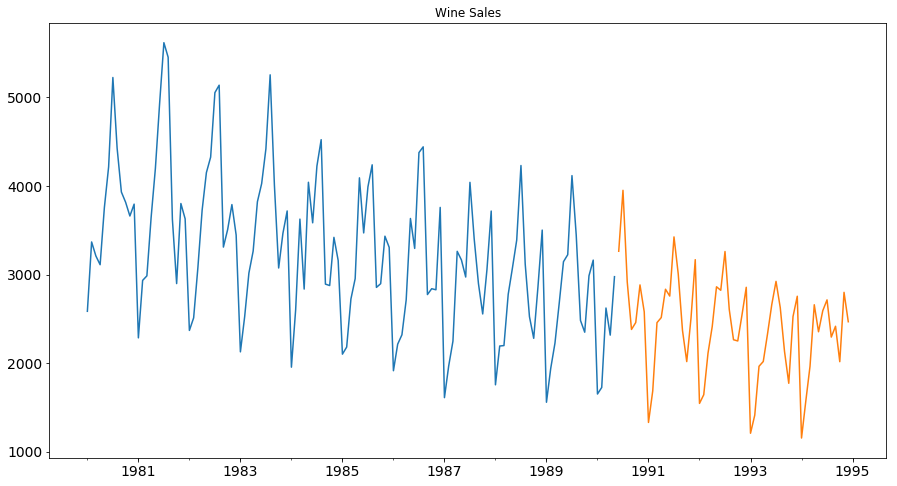

In [25]:
#Plot data
train.Fortified.plot(figsize=(15,8), title= 'Wine Sales', fontsize=14)
test.Fortified.plot(figsize=(15,8), title= 'Wine Sales', fontsize=14)


### Naive Approach: \hat{y}t+1 = yt

In [26]:
x_train = train.drop('Fortified', axis=1)
x_test = test.drop('Fortified', axis=1)
y_train = train[['Fortified']]
y_test = test[['Fortified']]

In [27]:
dd= np.asarray(train.Fortified)
dd

array([2585, 3368, 3210, 3111, 3756, 4216, 5225, 4426, 3932, 3816, 3661,
       3795, 2285, 2934, 2985, 3646, 4198, 4935, 5618, 5454, 3624, 2898,
       3802, 3629, 2369, 2511, 3079, 3728, 4151, 4326, 5054, 5138, 3310,
       3508, 3790, 3446, 2127, 2523, 3017, 3265, 3822, 4027, 4420, 5255,
       4009, 3074, 3465, 3718, 1954, 2604, 3626, 2836, 4042, 3584, 4225,
       4523, 2892, 2876, 3420, 3159, 2101, 2181, 2724, 2954, 4092, 3470,
       3990, 4239, 2855, 2897, 3433, 3307, 1914, 2214, 2320, 2714, 3633,
       3295, 4377, 4442, 2774, 2840, 2828, 3758, 1610, 1968, 2248, 3262,
       3164, 2972, 4041, 3402, 2898, 2555, 3056, 3717, 1755, 2193, 2198,
       2777, 3076, 3389, 4231, 3118, 2524, 2280, 2862, 3502, 1558, 1940,
       2226, 2676, 3145, 3224, 4117, 3446, 2482, 2349, 2986, 3163, 1651,
       1725, 2622, 2316, 2976], dtype=int64)

In [28]:
y_hat = test.copy()

In [29]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

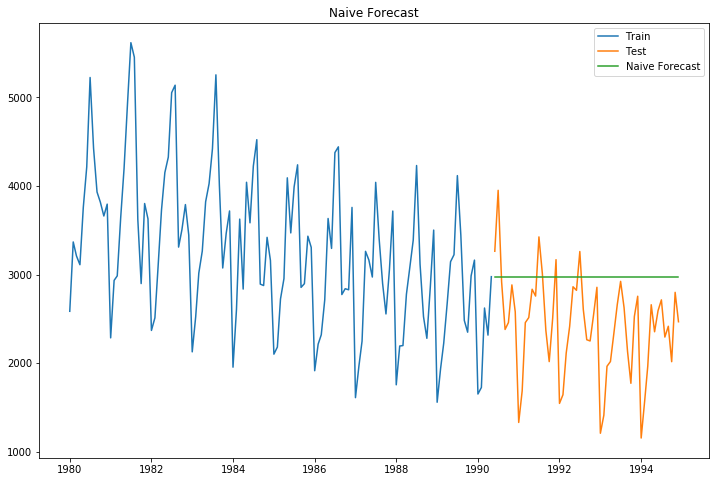

In [30]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Fortified'], label='Train')
plt.plot(test.index,test['Fortified'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.title('Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [31]:
#RMSE Calculation
rmse = sqrt(mean_squared_error(test.Fortified, y_hat.naive))
rmse = round(rmse, 3)
rmse

791.566

In [32]:
abs_error = np.abs(y_test['Fortified']-y_hat.naive)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.3371

In [33]:
resultsDf = pd.DataFrame({'Method':['Naive forecast'], 'rmse': [rmse]})
resultsDf

resultsDf = pd.DataFrame({'Method':['Naive forecast'], 'MAPE': [mape], 'rmse': [rmse]})
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method     rmse    MAPE
0  Naive forecast  791.566  0.3371

We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability. 
It is best suited for stable datasets.

## Simple Average

In [34]:
y_hat_avg = test.copy()

In [35]:
y_hat_avg['avg_forecast'] = train['Fortified'].mean()

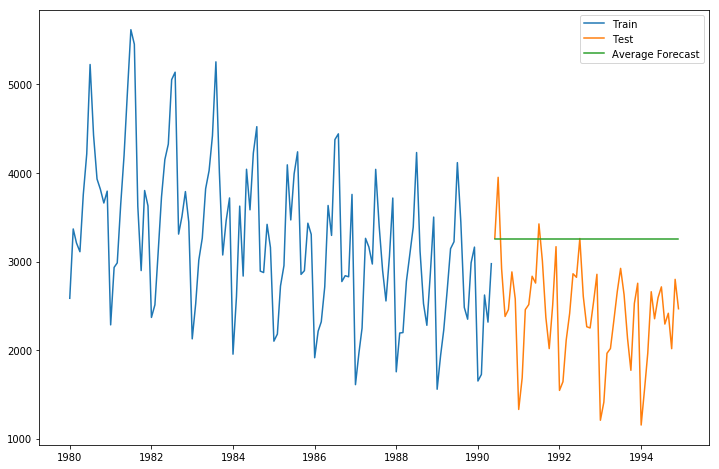

In [36]:
plt.figure(figsize=(12,8))
plt.plot(train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [37]:
rmse = sqrt(mean_squared_error(test.Fortified, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
rmse

1006.854

In [38]:
abs_error = np.abs(y_test['Fortified']-y_hat_avg.avg_forecast)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4455

In [39]:
tempResultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method      rmse    MAPE
0           Naive forecast   791.566  0.3371
0  Simple average forecast  1006.854  0.4455

### Moving Average

In [40]:
df1 = df.copy()

In [41]:
df1['moving_avg_forecast'] = df['Fortified'].rolling(12).mean()

In [42]:
df1.head(2)

Fortified  moving_avg_forecast
1980-01-01       2585                  NaN
1980-02-01       3368                  NaN

In [43]:
df1.tail(2)

Fortified  moving_avg_forecast
1994-11-01       2799          2273.833333
1994-12-01       2467          2249.833333

In [44]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [45]:
y_hat_avg = test.copy()
y_hat_avg

Fortified  moving_avg_forecast
1990-06-01       3263          2758.000000
1990-07-01       3951          2744.166667
1990-08-01       2917          2700.083333
1990-09-01       2380          2691.583333
1990-10-01       2458          2700.666667
1990-11-01       2883          2692.083333
1990-12-01       2579          2643.416667
1991-01-01       1330          2616.666667
1991-02-01       1686          2613.416667
1991-03-01       2457          2599.666667
1991-04-01       2514          2616.166667
1991-05-01       2834          2604.333333
1991-06-01       2757          2562.166667
1991-07-01       3425          2518.333333
1991-08-01       3006          2525.750000
1991-09-01       2369          2524.833333
1991-10-01       2017          2488.083333
1991-11-01       2507          2456.750000
1991-12-01       3168          2505.833333
1992-01-01       1545          2523.750000
1992-02-01       1643          2520.166667
1992-03-01       2112          2491.416667
1992-04-01       2415          2483.166667
1992-05-01       2862          2485.500000
1992-06-01       2822          2490.916667
1992-07-01       3260          2477.166667
1992-08-01       2606          2443.833333
1992-09-01       2264          2435.083333
1992-10-01       2250          2454.500000
1992-11-01       2545          2457.666667
1992-12-01       2856          2431.666667
1993-01-01       1208          2403.583333
1993-02-01       1412          2384.333333
1993-03-01       1964          2372.000000
1993-04-01       2018          2338.916667
1993-05-01       2329          2294.500000
1993-06-01       2660          2281.000000
1993-07-01       2923          2252.916667
1993-08-01       2626          2254.583333
1993-09-01       2132          2243.583333
1993-10-01       1772          2203.750000
1993-11-01       2526          2202.166667
1993-12-01       2755          2193.750000
1994-01-01       1154          2189.250000
1994-02-01       1568          2202.250000
1994-03-01       1965          2202.333333
1994-04-01       2659          2255.750000
1994-05-01       2354          2257.833333
1994-06-01       2592          2252.166667
1994-07-01       2714          2234.750000
1994-08-01       2294          2207.083333
1994-09-01       2416          2230.750000
1994-10-01       2016          2251.083333
1994-11-01       2799          2273.833333
1994-12-01       2467          2249.833333

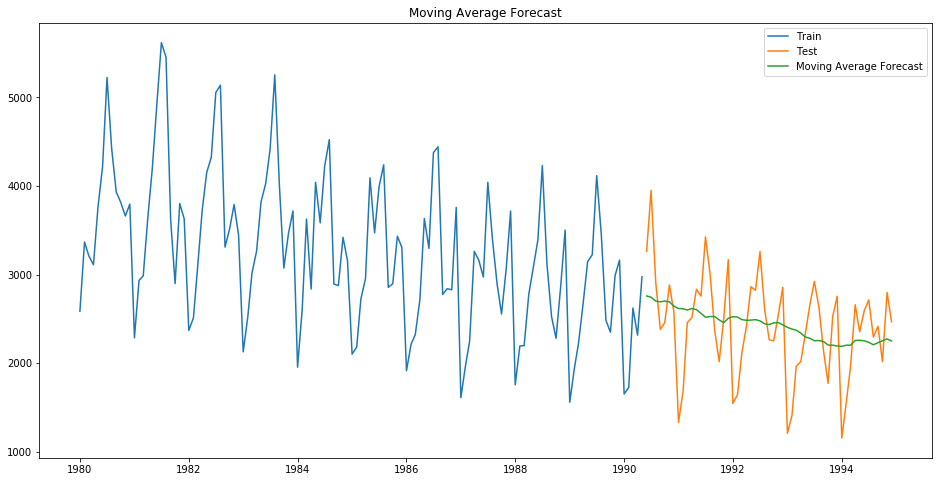

In [46]:
plt.figure(figsize=(16,8))
plt.plot(train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.title('Moving Average Forecast')
plt.legend(loc='best')

In [47]:
y_hat_avg.moving_avg_forecast

1990-06-01    2758.000000
1990-07-01    2744.166667
1990-08-01    2700.083333
1990-09-01    2691.583333
1990-10-01    2700.666667
1990-11-01    2692.083333
1990-12-01    2643.416667
1991-01-01    2616.666667
1991-02-01    2613.416667
1991-03-01    2599.666667
1991-04-01    2616.166667
1991-05-01    2604.333333
1991-06-01    2562.166667
1991-07-01    2518.333333
1991-08-01    2525.750000
1991-09-01    2524.833333
1991-10-01    2488.083333
1991-11-01    2456.750000
1991-12-01    2505.833333
1992-01-01    2523.750000
1992-02-01    2520.166667
1992-03-01    2491.416667
1992-04-01    2483.166667
1992-05-01    2485.500000
1992-06-01    2490.916667
1992-07-01    2477.166667
1992-08-01    2443.833333
1992-09-01    2435.083333
1992-10-01    2454.500000
1992-11-01    2457.666667
1992-12-01    2431.666667
1993-01-01    2403.583333
1993-02-01    2384.333333
1993-03-01    2372.000000
1993-04-01    2338.916667
1993-05-01    2294.500000
1993-06-01    2281.000000
1993-07-01    2252.916667
1993-08-01  

In [48]:
rmse = sqrt(mean_squared_error(test.Fortified, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

536.311

In [49]:
abs_error = np.abs(y_test['Fortified']-y_hat_avg.moving_avg_forecast)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2088

In [50]:
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method      rmse    MAPE
0           Naive forecast   791.566  0.3371
0  Simple average forecast  1006.854  0.4455
0  Moving average forecast   536.311  0.2088

## SES Forecast

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [52]:
# create class
model = SimpleExpSmoothing(train['Fortified'])

In [53]:
# fit model
model_fit = model.fit(smoothing_level=0.1,optimized=False)
model_fit.params

{'smoothing_level': 0.1,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 2585.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [54]:
y_hat_avg = test.copy()

In [55]:
y_hat_avg['SES'] = model_fit.forecast(len(test['Fortified']))

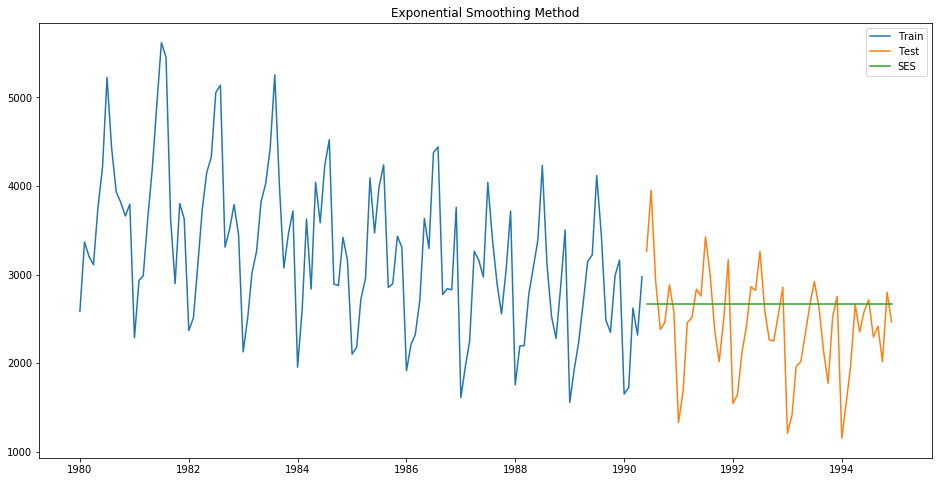

In [56]:
plt.figure(figsize=(16,8))
plt.plot(train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.title('Exponential Smoothing Method')
plt.legend(loc='best')

In [57]:
rmse = sqrt(mean_squared_error(test.Fortified, y_hat_avg.SES))
rmse = round(rmse, 3)
rmse

614.393

In [58]:
abs_error = np.abs(y_test['Fortified']-y_hat_avg.SES)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2437

In [59]:
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method      rmse    MAPE
0           Naive forecast   791.566  0.3371
0  Simple average forecast  1006.854  0.4455
0  Moving average forecast   536.311  0.2088
0             SES forecast   614.393  0.2437

## Holt

In [60]:
fit1 = ExponentialSmoothing(np.asarray(train['Fortified']) ,seasonal_periods=12 ,trend='add', seasonal='None').fit()
fit1.params

{'smoothing_level': 0.752742236901384,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2770.2922393333565,
 'initial_slope': 0.39733569634570637,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [61]:
y_hat_avg['Holt'] = fit1.forecast(len(test))


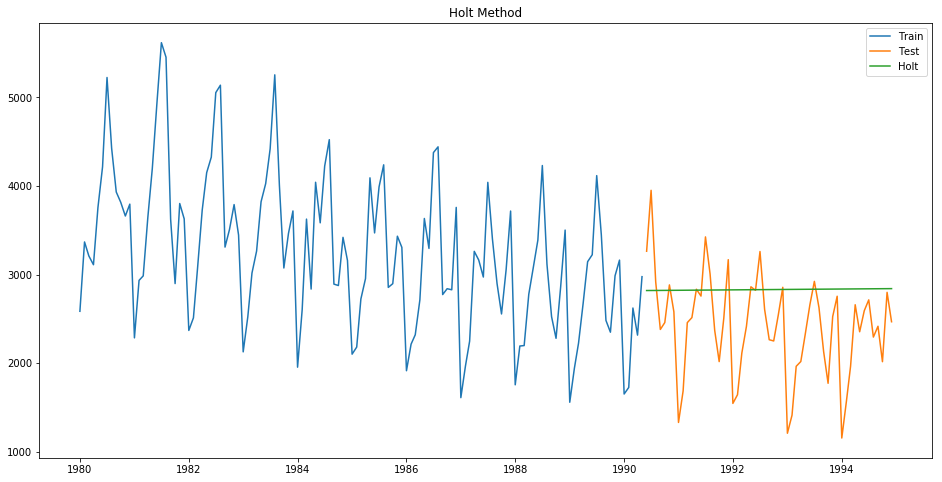

In [62]:
plt.figure(figsize=(16,8))
plt.plot( train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.title('Holt Method')
plt.legend(loc='best')

In [63]:
rmse = sqrt(mean_squared_error(test.Fortified, y_hat_avg.Holt))
rmse = round(rmse, 3)
rmse

697.908

In [64]:
abs_error = np.abs(y_test['Fortified']-y_hat_avg.Holt)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2867

In [65]:
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method      rmse    MAPE
0           Naive forecast   791.566  0.3371
0  Simple average forecast  1006.854  0.4455
0  Moving average forecast   536.311  0.2088
0             SES forecast   614.393  0.2437
0                     Holt   697.908  0.2867

## Holt Winter - Additive

In [66]:
y_hat_avg = test.copy()

In [67]:
fit1 = ExponentialSmoothing(np.asarray(train['Fortified']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.05786392742144099,
 'smoothing_slope': 0.057863770251174805,
 'smoothing_seasonal': 0.5390921645552923,
 'damping_slope': nan,
 'initial_level': 2040.7979735343401,
 'initial_slope': 6.040080171522967,
 'initial_seasons': array([ 582.74066394, 1351.69536781, 1217.69227967, 1149.43307228,
        1789.35415861, 2246.75742093, 3238.80988834, 2481.3958796 ,
        1924.18059004, 1792.18010298, 1677.96416076, 1797.23913012]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

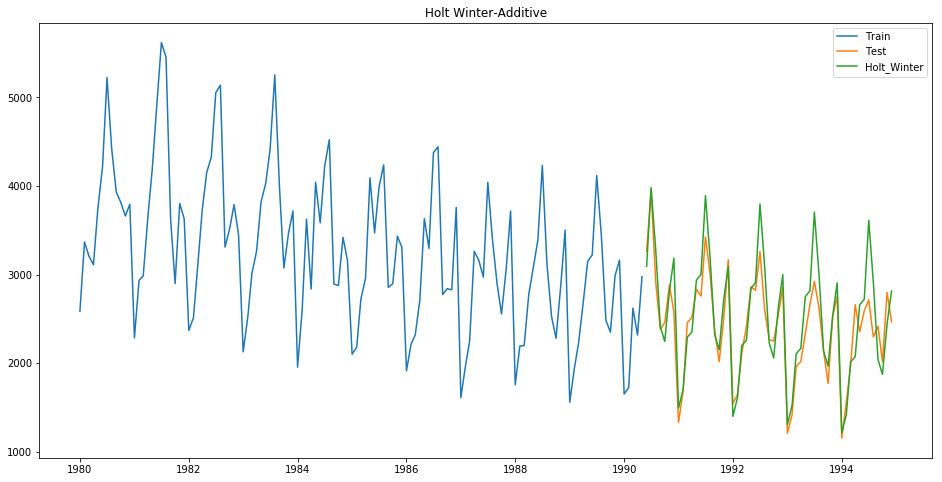

In [69]:
plt.figure(figsize=(16,8))
plt.plot( train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt Winter-Additive')
plt.legend(loc='best')

In [70]:
rmse = sqrt(mean_squared_error(test.Fortified, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

297.281

In [71]:
abs_error = np.abs(y_test['Fortified']-y_hat_avg.Holt_Winter)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0891

In [72]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method      rmse    MAPE
0                   Naive forecast   791.566  0.3371
0          Simple average forecast  1006.854  0.4455
0          Moving average forecast   536.311  0.2088
0                     SES forecast   614.393  0.2437
0                             Holt   697.908  0.2867
0  Holt Winter forecast - Additive   297.281  0.0891

## Holt Winter forecast - Multiplicative

In [73]:
fit1 = ExponentialSmoothing(np.asarray(train['Fortified']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.07729904664597378,
 'smoothing_slope': 0.07729809852023782,
 'smoothing_seasonal': 0.41541296667179206,
 'damping_slope': nan,
 'initial_level': 1991.7273007984786,
 'initial_slope': 6.29811905351839,
 'initial_seasons': array([1.23365434, 1.52925758, 1.60131654, 1.69559364, 1.99462577,
        2.18015947, 2.58227479, 2.44317834, 1.84319955, 1.70757472,
        1.8541717 , 1.84286566]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

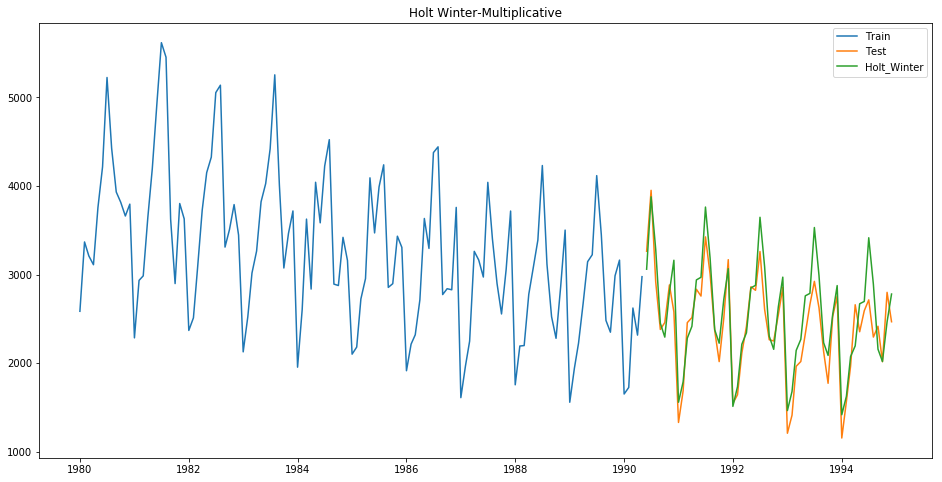

In [75]:
plt.figure(figsize=(16,8))
plt.plot( train['Fortified'], label='Train')
plt.plot(test['Fortified'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt Winter-Multiplicative')
plt.legend(loc='best')

In [76]:
rmse = sqrt(mean_squared_error(test.Fortified, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

269.731

In [77]:
abs_error = np.abs(y_test['Fortified']-y_hat_avg.Holt_Winter)
actual = y_test['Fortified']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0914

In [78]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Mult'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method      rmse    MAPE
0                   Naive forecast   791.566  0.3371
0          Simple average forecast  1006.854  0.4455
0          Moving average forecast   536.311  0.2088
0                     SES forecast   614.393  0.2437
0                             Holt   697.908  0.2867
0  Holt Winter forecast - Additive   297.281  0.0891
0      Holt Winter forecast - Mult   269.731  0.0914

In [79]:
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

Method      rmse    MAPE
0                   Naive forecast   791.566  0.3371
1          Simple average forecast  1006.854  0.4455
2          Moving average forecast   536.311  0.2088
3                     SES forecast   614.393  0.2437
4                             Holt   697.908  0.2867
5  Holt Winter forecast - Additive   297.281  0.0891
6      Holt Winter forecast - Mult   269.731  0.0914

## Sales of the 6 wine types  given time period 

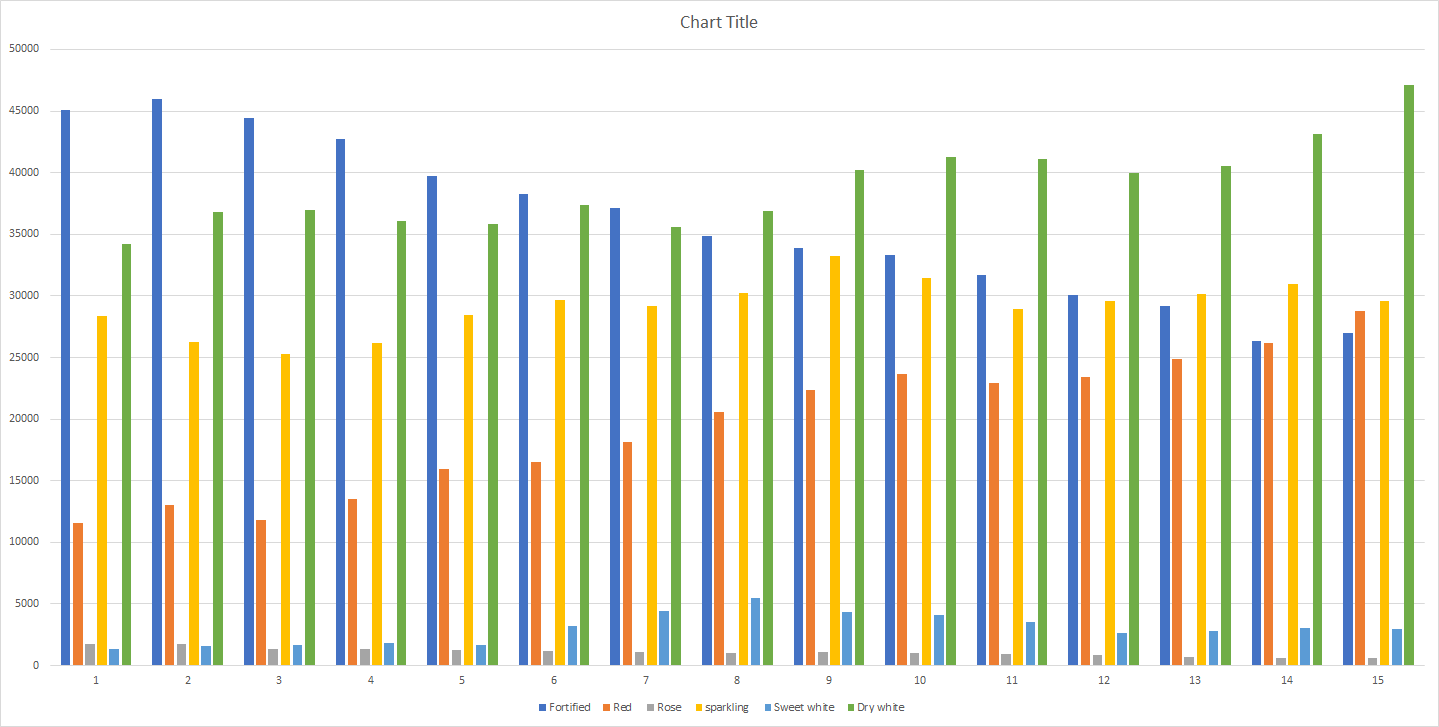

From the above Graph, it is found that ths sales of Fortified wine has come down whereas 
the sales of Dry white wine has grown between the years 1980 and 1994

In [83]:
df1=pd.read_csv('AustralianWines.csv')
df1.corr()

Fortified      Red      Rose   sparkling   Sweet white  Dry white
Fortified     1.000000 -0.007608  0.651261    0.092737    -0.125557   0.126792
Red          -0.007608  1.000000 -0.328138    0.270928     0.476127   0.626902
Rose          0.651261 -0.328138  1.000000    0.392965    -0.105588   0.180860
sparkling     0.092737  0.270928  0.392965    1.000000     0.495155   0.792885
Sweet white  -0.125557  0.476127 -0.105588    0.495155     1.000000   0.451236
Dry white     0.126792  0.626902  0.180860    0.792885     0.451236   1.000000

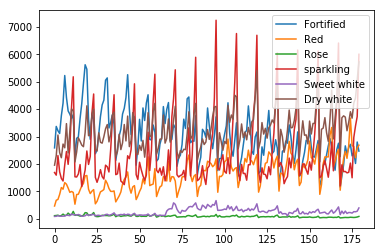

In [84]:
df1.plot()